# Figure 4 and 4S (supplemental) panels

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import re
from pathlib import Path
import utils.fig_utils as fig_utils


In [3]:
import importlib
%load_ext autoreload
%autoreload 2

In [4]:
from utils.fig4_utils import *

In [5]:
# Set the directory for where to save figures, create the directory if it doesn't exist
fig_outdir = 'figures'
data_dir = '../data/'
Path(fig_outdir).mkdir(parents=True, exist_ok=True)

# Data

In [6]:
fig_utils.download_data(data_dir + 'SVAE_SM_library_codons_merged.csv', fig_utils.urls['SVAE_SM_library_codons_merged.csv'])
fig_utils.download_data(data_dir + 'SVAE_SM_library_codons_separate.csv', fig_utils.urls['SVAE_SM_library_codons_separate.csv'])
fig_utils.download_data(data_dir + 'round2_codons_merged.csv', fig_utils.urls['round2_codons_merged.csv'])
fig_utils.download_data(data_dir + 'LY6A_SVAE_generated_sequences.csv', fig_utils.urls['LY6A_SVAE_generated_sequences.csv'])
fig_utils.download_data(data_dir + 'LY6C1_SVAE_generated_sequences.csv', fig_utils.urls['LY6C1_SVAE_generated_sequences.csv'])
fig_utils.download_data(data_dir + 'LY6A_SVAE_training_predictions.csv', fig_utils.urls['LY6A_SVAE_training_predictions.csv'])
fig_utils.download_data(data_dir + 'LY6C1_SVAE_training_predictions.csv', fig_utils.urls['LY6C1_SVAE_training_predictions.csv'])


Already have ../data/SVAE_SM_library_codons_merged.csv skipping download.
Already have ../data/SVAE_SM_library_codons_separate.csv skipping download.
Already have ../data/round2_codons_merged.csv skipping download.
Already have ../data/LY6A_SVAE_generated_sequences.csv skipping download.
Already have ../data/LY6C1_SVAE_generated_sequences.csv skipping download.
Already have ../data/LY6A_SVAE_training_predictions.csv skipping download.
Already have ../data/LY6C1_SVAE_training_predictions.csv skipping download.


## SVAE + saturation mutagenesis library, pulldown and in vivo assays, codon replicates aggregated

In [12]:
ss_df = pd.read_csv(data_dir + 'SVAE_SM_library_codons_merged.csv')
ss_df

0 AA_sequence        Model Source Receptor               reference  \
0      NaN     AAAFGEV  SVAE_model2     9K     LY6A  AAV9_588_SAQ_7mer_AQAQ   
1      NaN     AAAFGSV  SVAE_model2     9K     LY6A  AAV9_588_SAQ_7mer_AQAQ   
2      NaN     AAAFKNV  SVAE_model2     9K     LY6A  AAV9_588_SAQ_7mer_AQAQ   
3      NaN     AAAFREV  SVAE_model2     4K     LY6A  AAV9_588_SAQ_7mer_AQAQ   
4      NaN     AAAFREV  SVAE_model2     9K     LY6A  AAV9_588_SAQ_7mer_AQAQ   
...     ..         ...          ...    ...      ...                     ...   
128581 NaN     _YQNCDD    StopCodon   None     None  AAV9_588_SAQ_7mer_AQAQ   
128582 NaN     _YVYIKK    StopCodon   None     None  AAV9_588_SAQ_7mer_AQAQ   
128583 NaN     _YWPYQA    StopCodon   None     None  AAV9_588_SAQ_7mer_AQAQ   
128584 NaN     _YWTFIR    StopCodon   None     None  AAV9_588_SAQ_7mer_AQAQ   
128585 NaN         NaN           WT   AQAQ     None         AAV9_WT_SAQAQAQ   

         6   7   8  DNA_mean_RPM  ...  86  LY6A_log2enr  LY6C1_log2enr  89  \
0      NaN NaN NaN      5.800856  ... NaN           NaN      -4.961744 NaN   
1      NaN NaN NaN      5.020479  ... NaN     -2.712964            NaN NaN   
2      NaN NaN NaN      4.279890  ... NaN     -2.101165      -4.707426 NaN   
3      NaN NaN NaN      5.431963  ... NaN     -6.253820      -2.303630 NaN   
4      NaN NaN NaN      4.663844  ... NaN     -4.936891      -4.719440 NaN   
...     ..  ..  ..           ...  ...  ..           ...            ...  ..   
128581 NaN NaN NaN      4.396939  ... NaN      2.905494            NaN NaN   
128582 NaN NaN NaN      3.560874  ... NaN           NaN            NaN NaN   
128583 NaN NaN NaN      3.173121  ... NaN           NaN            NaN NaN   
128584 NaN NaN NaN      4.552200  ... NaN           NaN            NaN NaN   
128585 NaN NaN NaN      2.155896  ... NaN     -3.569007            NaN NaN   

        90  91  92  trans_brain_log2enr  94  log2fitness  
0      NaN NaN NaN            -8.430343 NaN    -0.892159  
1      NaN NaN NaN            -0.962918 NaN    -2.611382  
2      NaN NaN NaN            -9.275856 NaN     0.380006  
3      NaN NaN NaN            -8.554488 NaN    -0.324009  
4      NaN NaN NaN            -9.542158 NaN    -0.136399  
...     ..  ..  ..                  ...  ..          ...  
128581 NaN NaN NaN                  NaN NaN    -8.185454  
128582 NaN NaN NaN                  NaN NaN    -9.196935  
128583 NaN NaN NaN                  NaN NaN    -6.949968  
128584 NaN NaN NaN                  NaN NaN    -7.296796  
128585 NaN NaN NaN            -1.106297 NaN     0.868436  

[128586 rows x 96 columns]

## SVAE + saturation mutagenesis library, pulldown and in vivo assays, codon replicates separate

In [13]:
ss_df_sep = pd.read_csv(data_dir + 'SVAE_SM_library_codons_separate.csv')
ss_df_sep

0                                    sequence AA_sequence  \
0      NaN  AGTGCCCAAACGGCCCAGAAACCCTTCATAGCACAGGCGCAG     TAQKPFI   
1      NaN  AGTGCCCAAACAGCTCAAAAGCCATTTATCGCACAGGCGCAG     TAQKPFI   
2      NaN  AGTGCCCAAACACTTCAAAAGCCGTTCATTGCACAGGCGCAG     TLQKPFI   
3      NaN  AGTGCCCAAACCCTACAGAAACCTTTTATAGCACAGGCGCAG     TLQKPFI   
4      NaN  AGTGCCCAAACGGCTGCTAAACCATTCATAGCACAGGCGCAG     TAAKPFI   
...     ..                                         ...         ...   
251738 NaN                                         NaN     EGARPFL   
251739 NaN                                         NaN     LPDRPFL   
251740 NaN                                         NaN     NVSRPFL   
251741 NaN                                         NaN     SERRPFL   
251742 NaN                                         NaN     SYDRPFL   

                   Model        Source Receptor               reference   7  \
0                     SM       ***KPFI     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
1                     SM       ***KPFI     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
2                     SM       ***KPFI     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
3                     SM       ***KPFI     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
4                     SM       ***KPFI     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
...                  ...           ...      ...                     ...  ..   
251738  Positive_Control  Callibration     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
251739                SM  Callibration     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
251740                SM  Callibration     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
251741                SM  Callibration     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   
251742                SM  Callibration     LY6A  AAV9_588_SAQ_7mer_AQAQ NaN   

         8   9  ...  140  141  142  143  144  145  146  147  148  149  
0      NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1      NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2      NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3      NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4      NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...     ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
251738 NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
251739 NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
251740 NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
251741 NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
251742 NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[251743 rows x 150 columns]

## Round 2 library, pulldown and in vivo assays (codons aggregated)

In [14]:
r2_df = pd.read_csv(data_dir + 'round2_codons_merged.csv')
r2_df

/Users/barrya/.virtualenvs/pulldown/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


AA_sequence SOURCE          reference reference_sequence   4   5   6  \
0         *AGSMMV   STOP  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
1         *AKQGAQ   STOP  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
2         *AWYIIG   STOP  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
3         *CGCWAS   STOP  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
4         *CNQNIP   STOP  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
...           ...    ...                ...                ...  ..  ..  ..   
24974     YYLPEGG  LY6C1  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
24975     YYLPNGD  LY6C1  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
24976     YYPGYWE  LY6C1  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
24977     YYRGDSS  LY6C1  AAV9_588_7mer_NNN                NaN NaN NaN NaN   
24978     YYSHGST  LY6C1  AAV9_588_7mer_NNN                NaN NaN NaN NaN   

        7  DNA_1_RPM  DNA_2_RPM  ...  F1-BalbC-B_log2enr  F2-BalbC-B_log2enr  \
0     NaN  12.860694  11.726311  ...                 NaN                 NaN   
1     NaN  11.145935  11.275300  ...                 NaN                 NaN   
2     NaN  11.788970  10.598782  ...                 NaN                 NaN   
3     NaN  11.360280  11.275300  ...                 NaN                 NaN   
4     NaN   5.787312   8.118216  ...                 NaN                 NaN   
...    ..        ...        ...  ...                 ...                 ...   
24974 NaN  12.324832  11.049794  ...                 NaN                 NaN   
24975 NaN   8.680969   7.441698  ...                 NaN                 NaN   
24976 NaN  11.788970   7.554451  ...                 NaN                 NaN   
24977 NaN   9.431176  11.275300  ...                 NaN                 NaN   
24978 NaN   8.788141   9.020240  ...                 NaN                 NaN   

       M1-BalbC-B_log2enr  M2-BalbC-B_log2enr  F1-C57-B_log2enr  \
0                     NaN                 NaN               NaN   
1                     NaN                 NaN               NaN   
2                     NaN                 NaN               NaN   
3                     NaN                 NaN               NaN   
4                     NaN                 NaN               NaN   
...                   ...                 ...               ...   
24974                 NaN                 NaN               NaN   
24975                 NaN                 NaN               NaN   
24976                 NaN                 NaN               NaN   
24977                 NaN                 NaN         -0.419874   
24978                 NaN                 NaN         -2.375330   

       M1-C57-B_log2enr  M2-C57-B_log2enr  BALB/c_log2enr  C57BL/6_log2enr  \
0                   NaN               NaN             NaN              NaN   
1                   NaN               NaN             NaN              NaN   
2                   NaN               NaN             NaN              NaN   
3                   NaN               NaN             NaN              NaN   
4                   NaN               NaN             NaN              NaN   
...                 ...               ...             ...              ...   
24974         -3.038558               NaN             NaN        -4.623521   
24975          2.221164               NaN             NaN         0.636201   
24976               NaN               NaN             NaN              NaN   
24977               NaN               NaN             NaN        -2.004836   
24978               NaN               NaN             NaN        -3.960292   

       log2fitness  
0        -7.459701  
1        -6.780696  
2        -6.779192  
3        -7.243019  
4              NaN  
...            ...  
24974    -0.238538  
24975    -1.391864  
24976    -5.444388  
24977    -0.054229  
24978     0.436694  

[24979 rows x 113 columns]

## Generated sequences from SVAE-based method, LY6A and LY6C1

In [15]:
gen_df_a = pd.read_csv(data_dir + 'LY6A_SVAE_generated_sequences.csv')
gen_df_c = pd.read_csv(data_dir + 'LY6C1_SVAE_generated_sequences.csv')

# Fig 4D - Position-weight matrix heatmaps, AA frequency bias

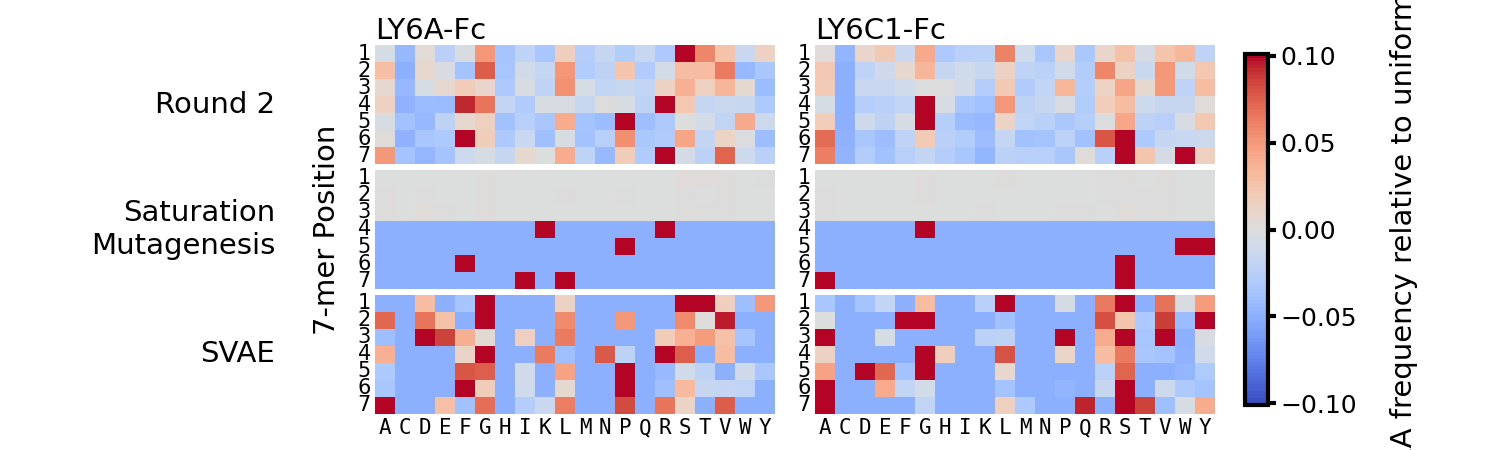

In [16]:
figname = 'fig4D'
png_path = plot_PWM(r2_df, ss_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 4E - UMAPs, sequence exploration

In [11]:
figname = 'fig4E'
_ = prep_sequence_exploration_UMAP(r2_df, ss_df)

Preparing UMAP clusters...
This will take on the order of 10 minutes.
Loading UMAP models...
Computing for LY6C1
Computing umap/clusters for SVAE...
Computing umap/clusters for SM...
Computing umap/clusters for R2...
Computing for Brain Transduction (LY6A)
Computing umap/clusters for SVAE...
Computing umap/clusters for SM...
Computing umap/clusters for R2...
Computing for LY6A
Computing umap/clusters for R2...
Computing for Brain Transduction (LY6C1)
Computing umap/clusters for R2...
Finished preparing UMAP clusters.
Pickling UMAP prep.


Index(['AA_sequence', 'LY6A_log2enr', 'LY6C1_log2enr', 'C57BL/6_log2enr',
       'SOURCE', 'log2fitness', 'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_sequence', 'Source', 'Model', 'Receptor', 'DNA_mean_RPM',
       'trans_brain_log2enr', 'LY6A_log2enr', 'LY6C1_log2enr', 'log2fitness',
       'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_sequence', 'Source', 'Model', 'Receptor', 'DNA_mean_RPM',
       'trans_brain_log2enr', 'LY6A_log2enr', 'LY6C1_log2enr', 'log2fitness',
       'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_sequence', 'LY6A_log2enr', 'LY6C1_log2enr', 'C57BL/6_log2enr',
       'SOURCE', 'log2fitness', 'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_sequence', 'Source', 'Model', 'Receptor', 'DNA_mean_RPM',
       'trans_brain_log2enr', 'LY6A_log2enr', 'LY6C1_log2enr', 'log2fitness',
       'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_seque

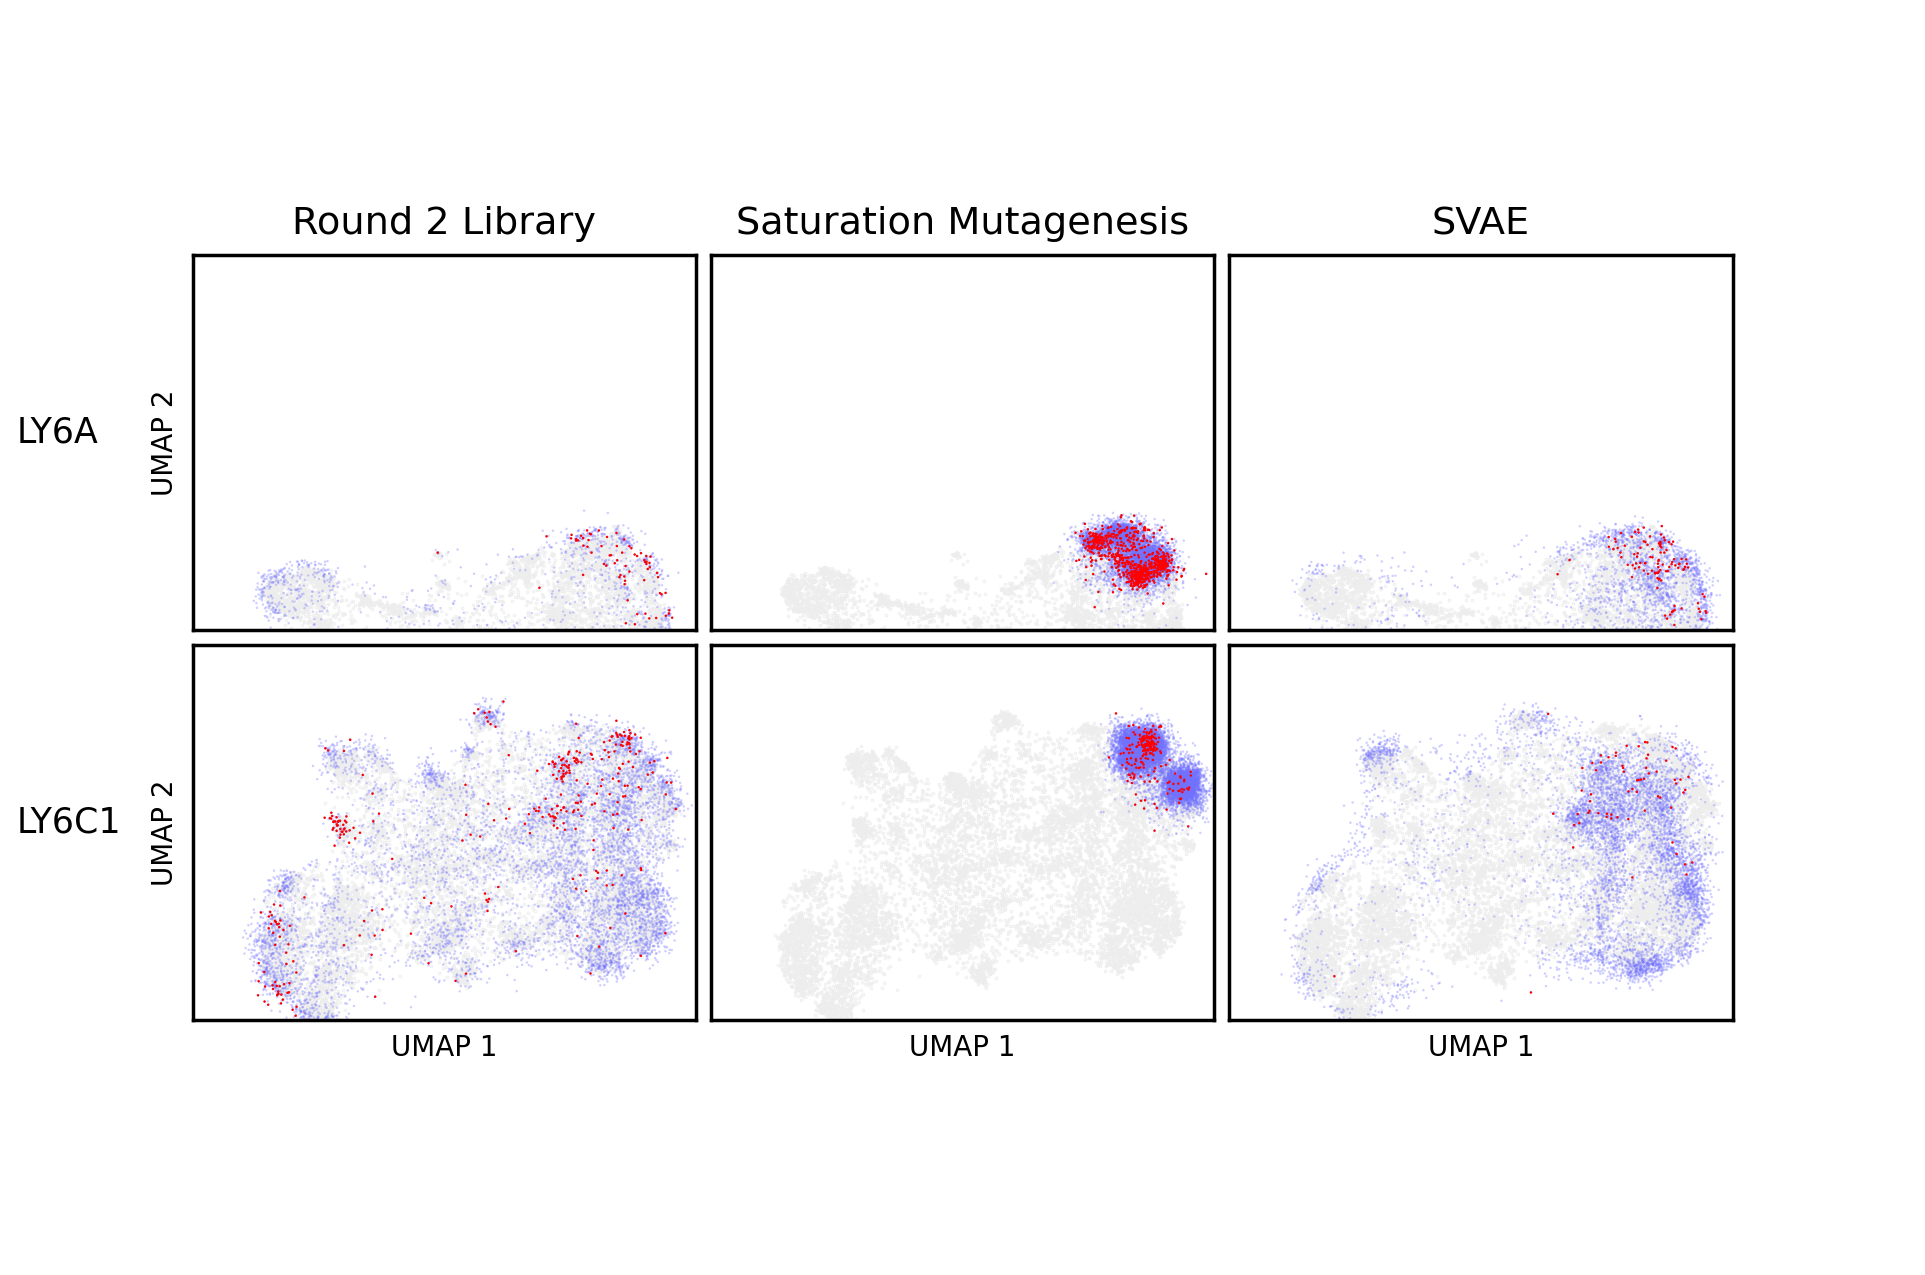

In [17]:
png_path = plot_sequence_exploration_UMAPs(r2_df, ss_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

Index(['AA_sequence', 'LY6A_log2enr', 'LY6C1_log2enr', 'C57BL/6_log2enr',
       'SOURCE', 'log2fitness', 'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_sequence', 'Source', 'Model', 'Receptor', 'DNA_mean_RPM',
       'trans_brain_log2enr', 'LY6A_log2enr', 'LY6C1_log2enr', 'log2fitness',
       'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_sequence', 'Source', 'Model', 'Receptor', 'DNA_mean_RPM',
       'trans_brain_log2enr', 'LY6A_log2enr', 'LY6C1_log2enr', 'log2fitness',
       'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_sequence', 'LY6A_log2enr', 'LY6C1_log2enr', 'C57BL/6_log2enr',
       'SOURCE', 'log2fitness', 'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_sequence', 'Source', 'Model', 'Receptor', 'DNA_mean_RPM',
       'trans_brain_log2enr', 'LY6A_log2enr', 'LY6C1_log2enr', 'log2fitness',
       'x1', 'x2', 'cluster', 'x1_y', 'x2_y'],
      dtype='object')
Index(['AA_seque

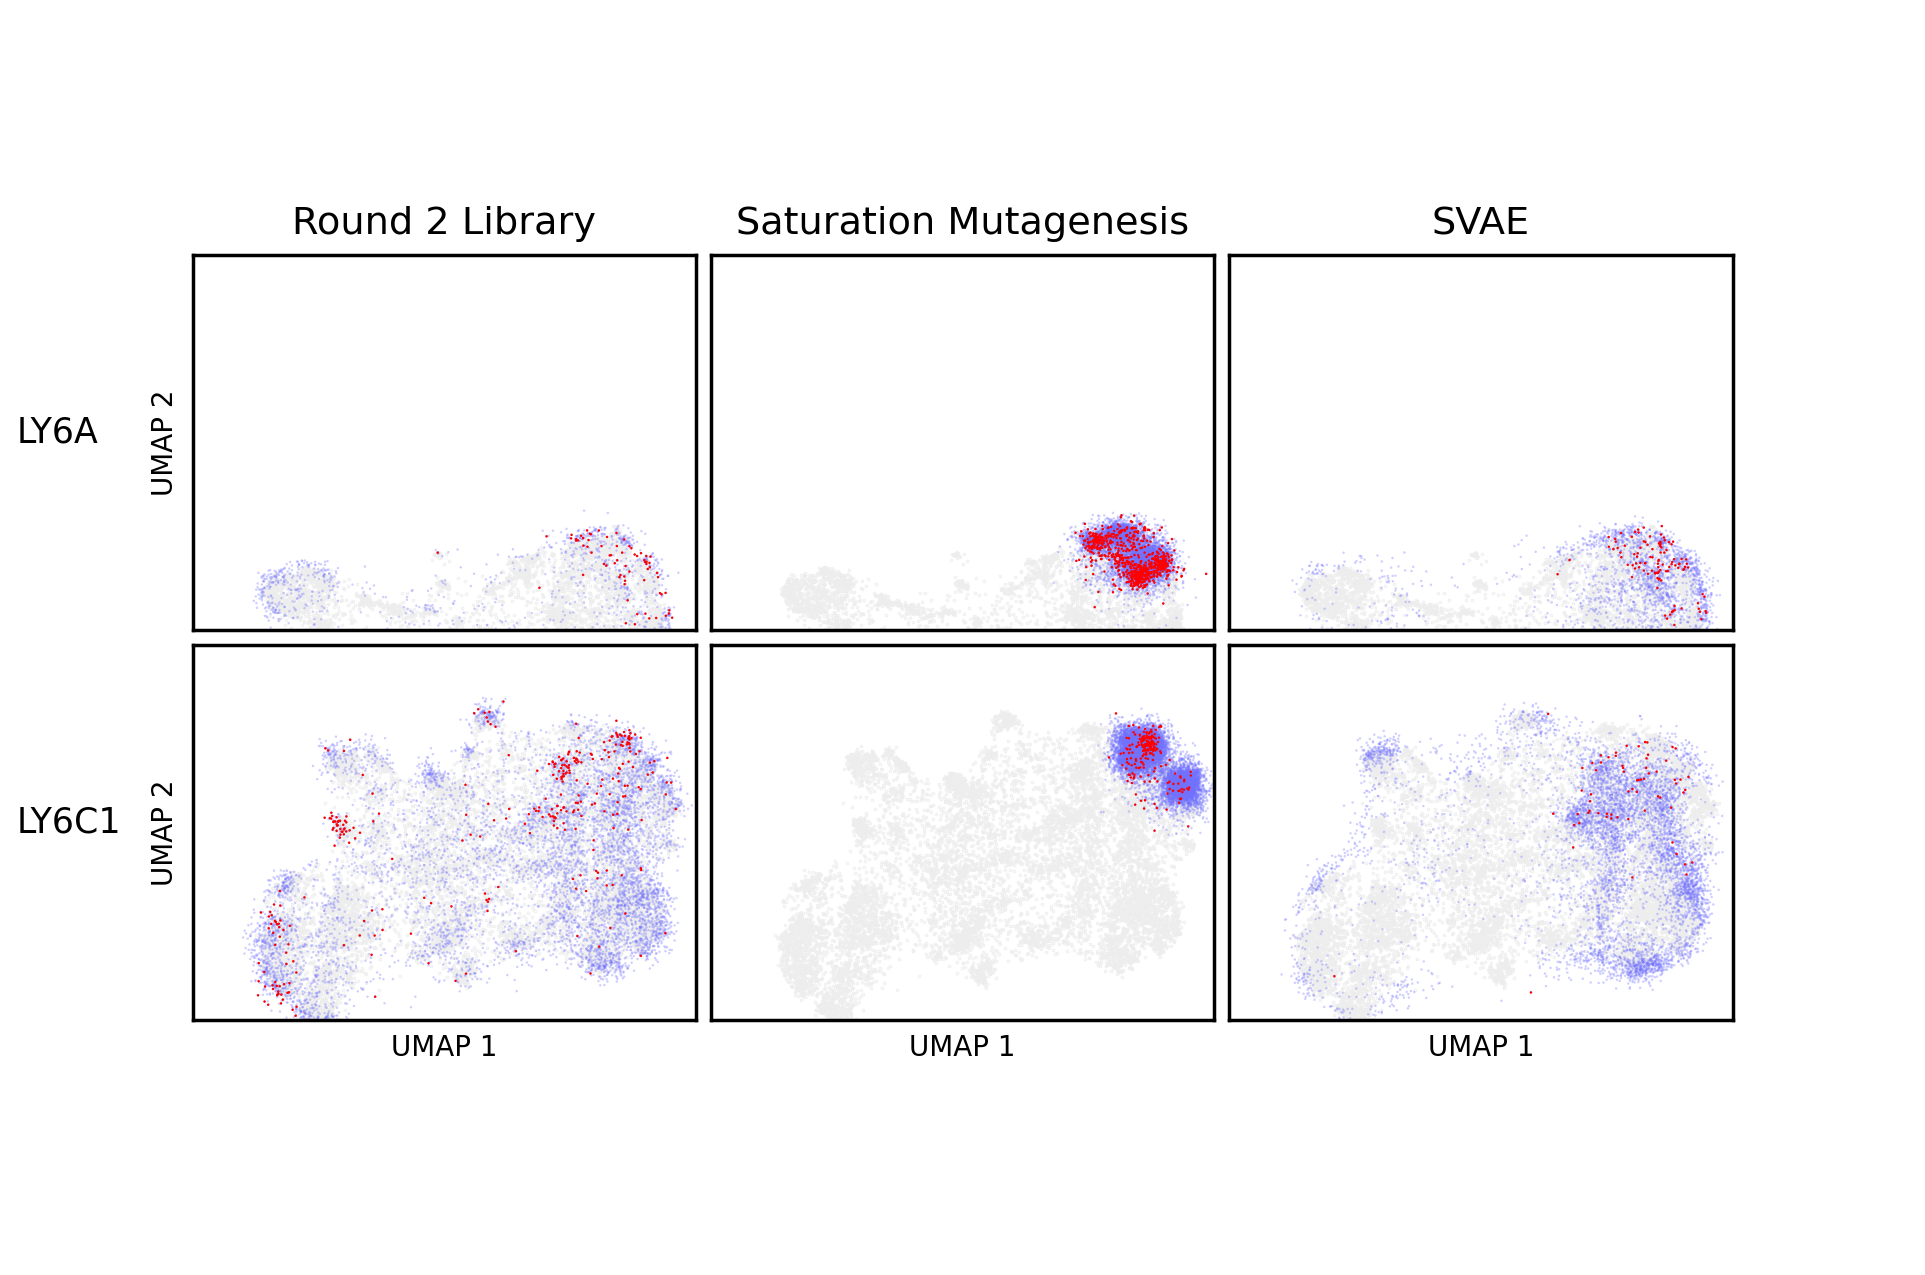

In [18]:
png_path = plot_sequence_exploration_UMAPs(r2_df, ss_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 4F - Scatter plots, cluster enrichment vs size
**Note:** Shown in paper with top and bottom rows of plots side-by-side rather than in a 2x2 grid.

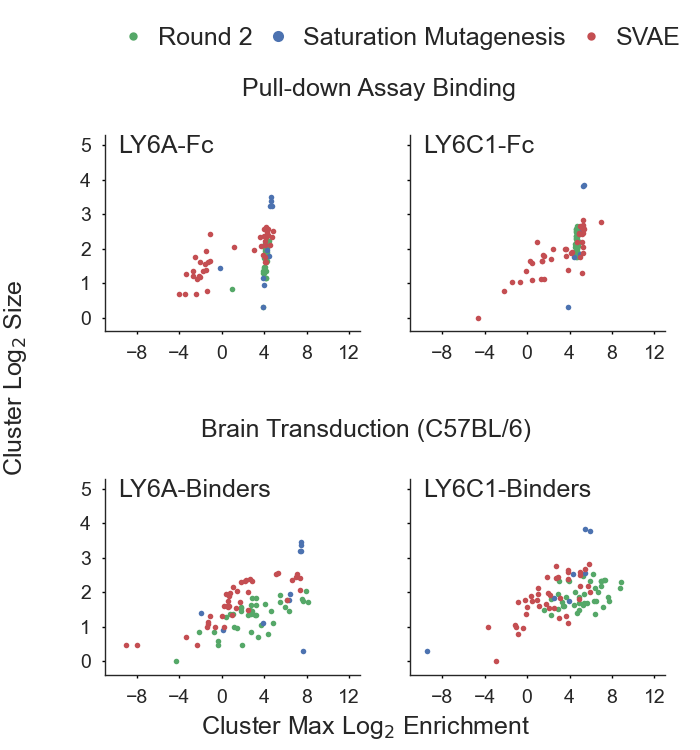

In [19]:
figname = 'fig4F'
png_path = plot_cluster_scatter(r2_df, ss_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 4S1 - Data-driven generated (SVAE+SM) library

## Fig 4S1B - Scatterplots, predicted binding and fitness
**Note:** Legend added in post-processing.

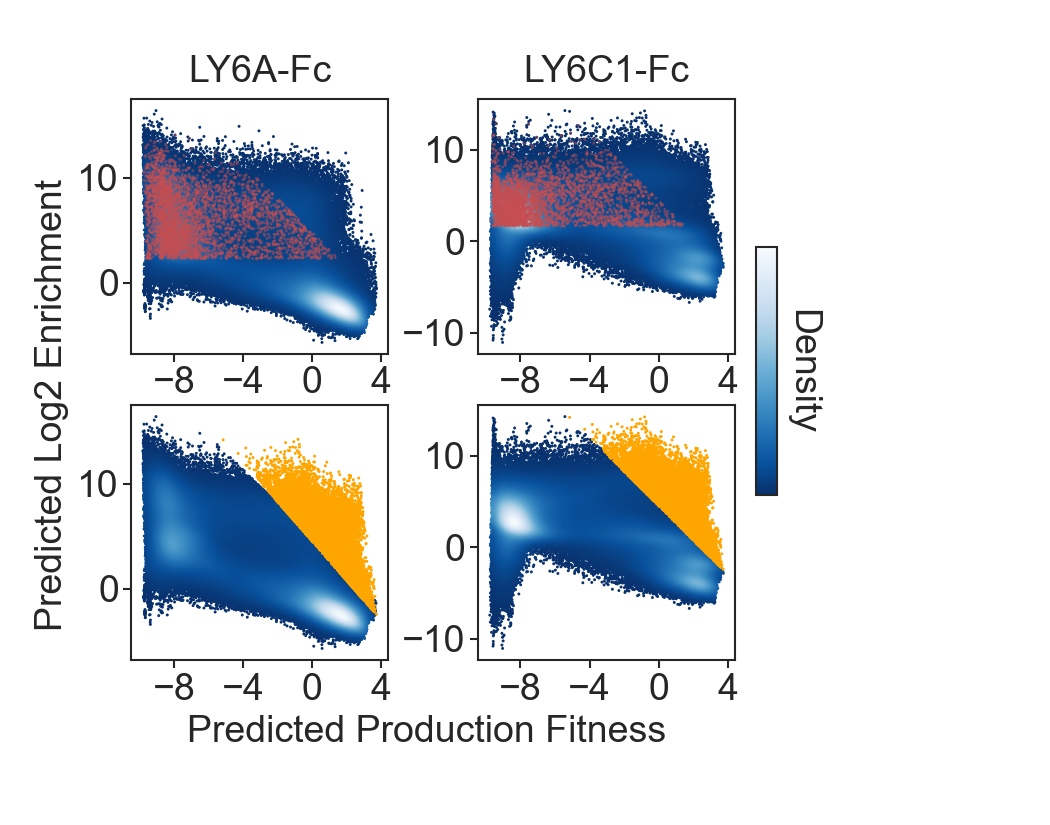

In [20]:
figname = 'fig4S1B'
png_path = plot_binding_fitness_scatter(gen_df_a, gen_df_c, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 4S1C - Ridge plots, measured fitness

LY6A None 6018 9.297367445309604


/Users/barrya/.virtualenvs/pulldown/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


LY6A 4K 959 11.98001249219238
LY6A 9K 20 0.10299191513466192
LY6C1 None 2055 3.1853551167188514
LY6C1 4K 1068 13.326678312952334
LY6C1 9K 2 0.010095401544596436


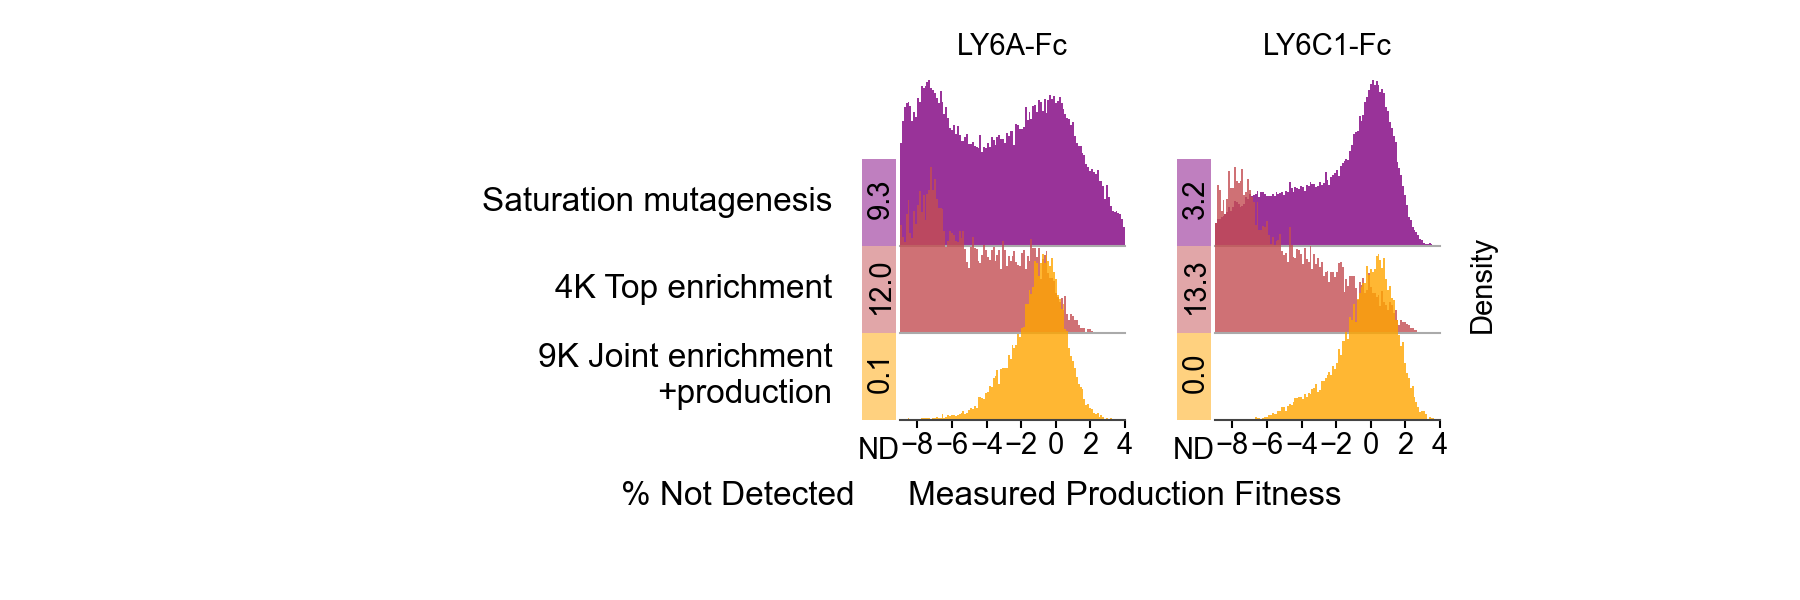

In [21]:
figname = 'fig4S1C'
png_path = plot_fitness_ridgeplots(ss_df_sep, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 4S2 - Library calibrations to Round 2

## Fig 4S2A - Scatter plot, library calibrations to Round 2 (LY6A)

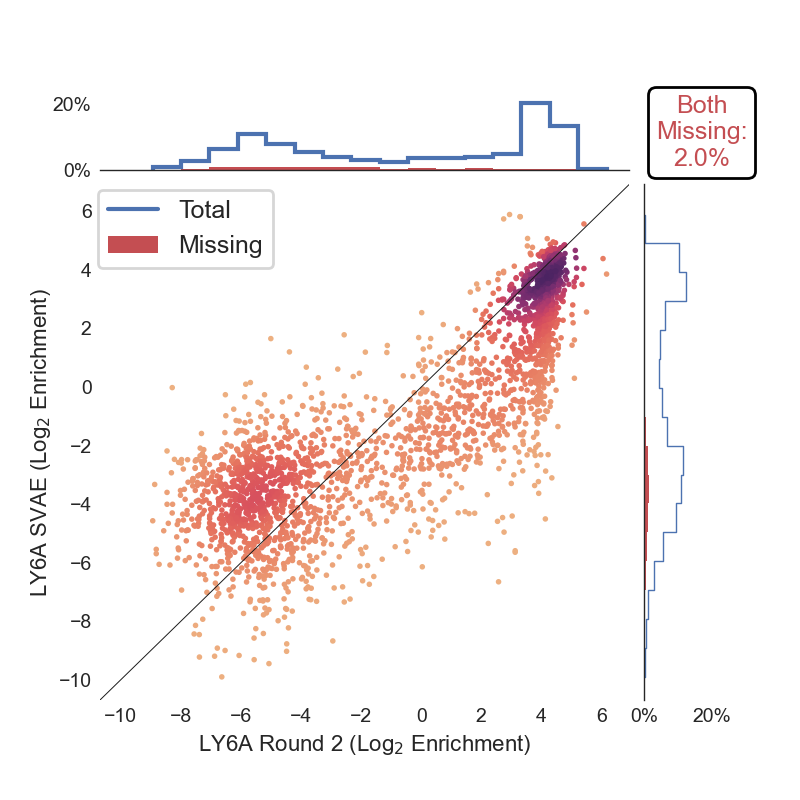

In [22]:
figname = 'fig4S2A'
png_path = plot_calibration(ss_df, r2_df, assay='LY6A', fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 4S2B - Scatter plot, library calibrations to Round 2 (LY6C1)

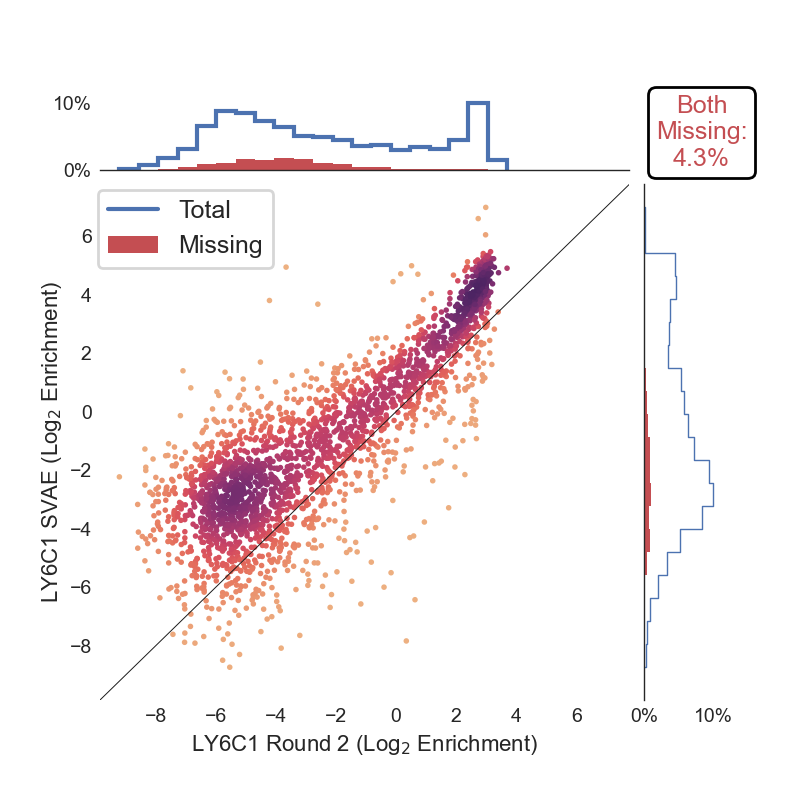

In [23]:
figname = 'fig4S2B'
png_path = plot_calibration(ss_df, r2_df, assay='LY6C1', fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 4S2C - Scatter plot, library calibrations to Round 2 (brain transduction)

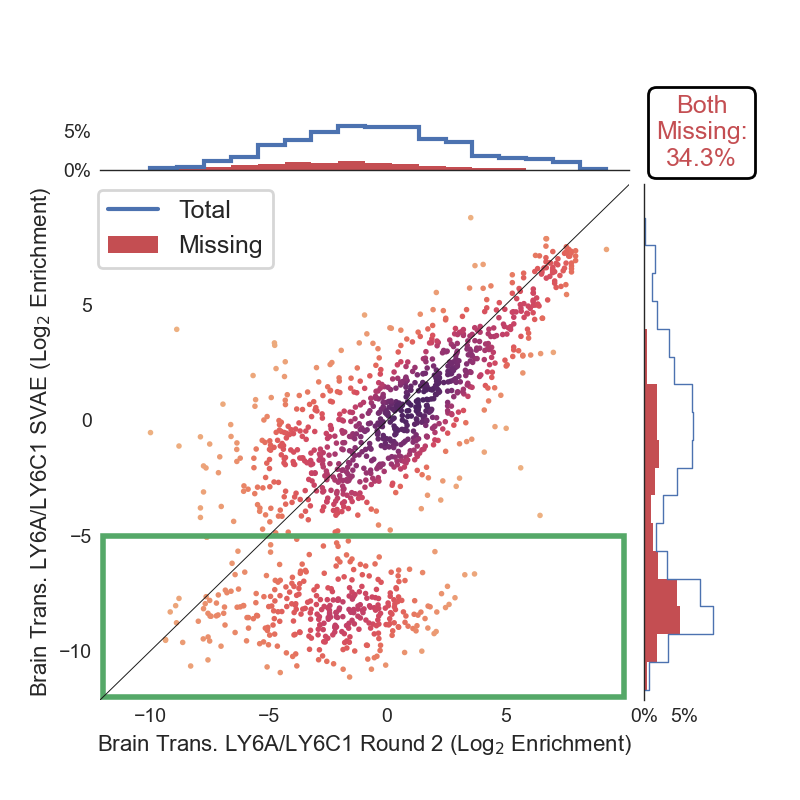

In [24]:
figname = 'fig4S2C'
png_path = plot_calibration(ss_df, r2_df, assay='brain_trans', fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 4S2D - Histograms, library calibrations to Round 2

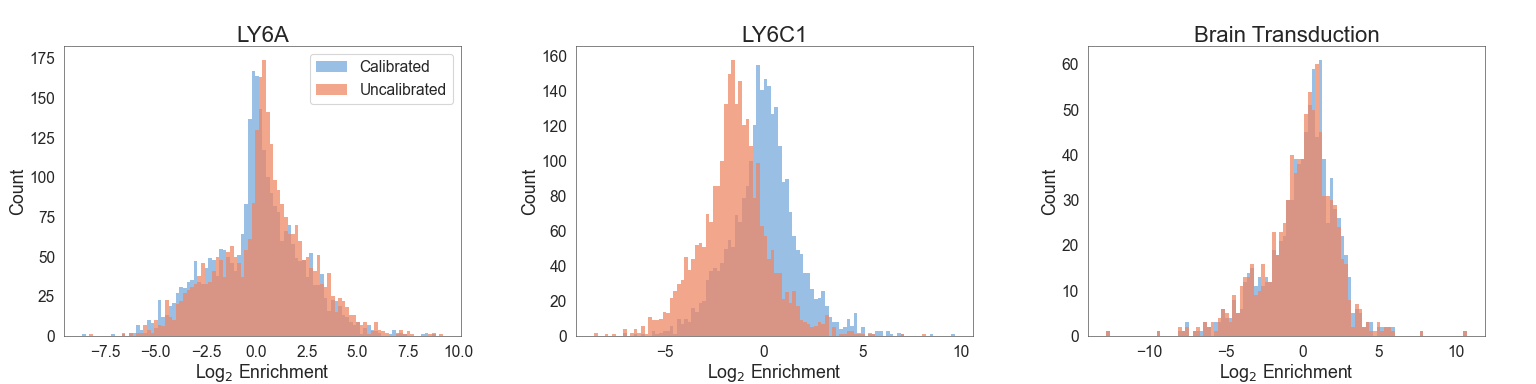

In [25]:
figname = 'fig4S2D'
png_path = plot_calibration_hist(ss_df, r2_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 4S3 - SVAE-based sequence generation 
**Note:** Exact labelings of axes and colorbar ticks may differ from original.

In [26]:
LY6A_preds = pd.read_csv(data_dir + 'LY6A_SVAE_training_predictions.csv')
LY6C1_preds = pd.read_csv(data_dir + 'LY6C1_SVAE_training_predictions.csv')

## Fig 4S3C - SVAE latent space clustering (LY6A)

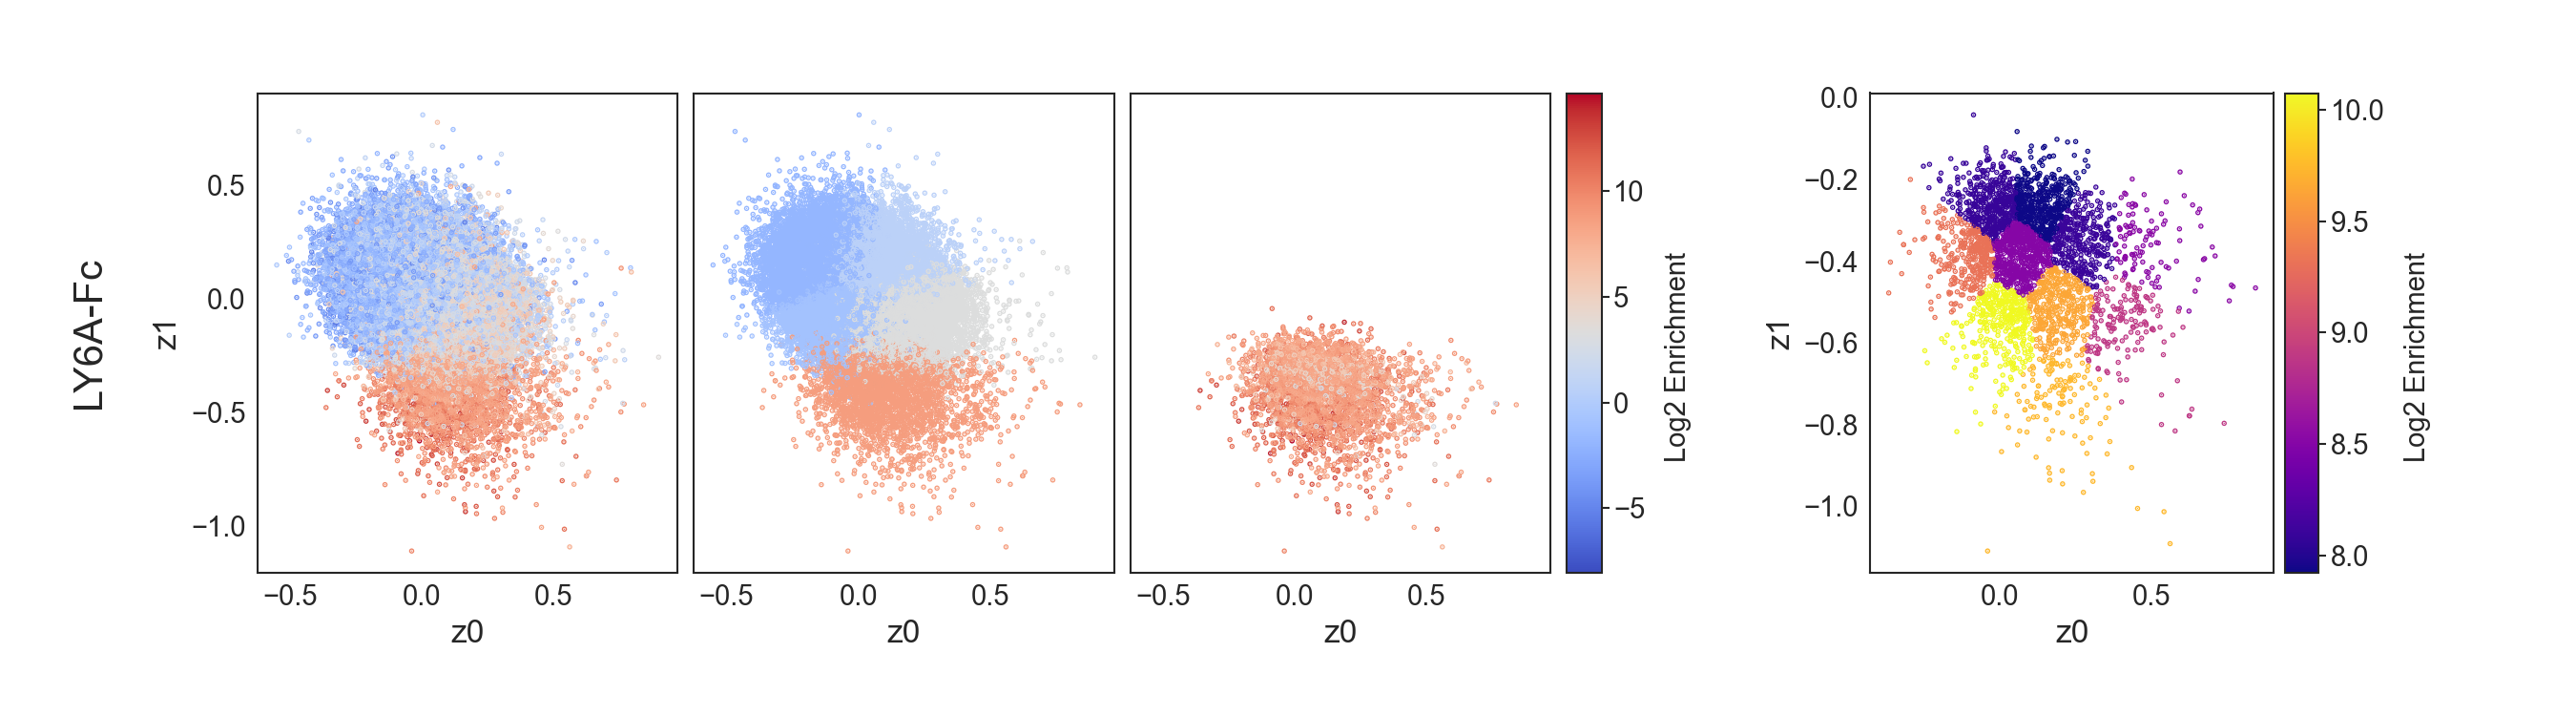

In [28]:
figname = 'fig4S3C'
png_path = plot_latent_spaces(LY6A_preds, receptor='LY6A', fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 4S3D - SVAE latent space clustering (LY6C1)

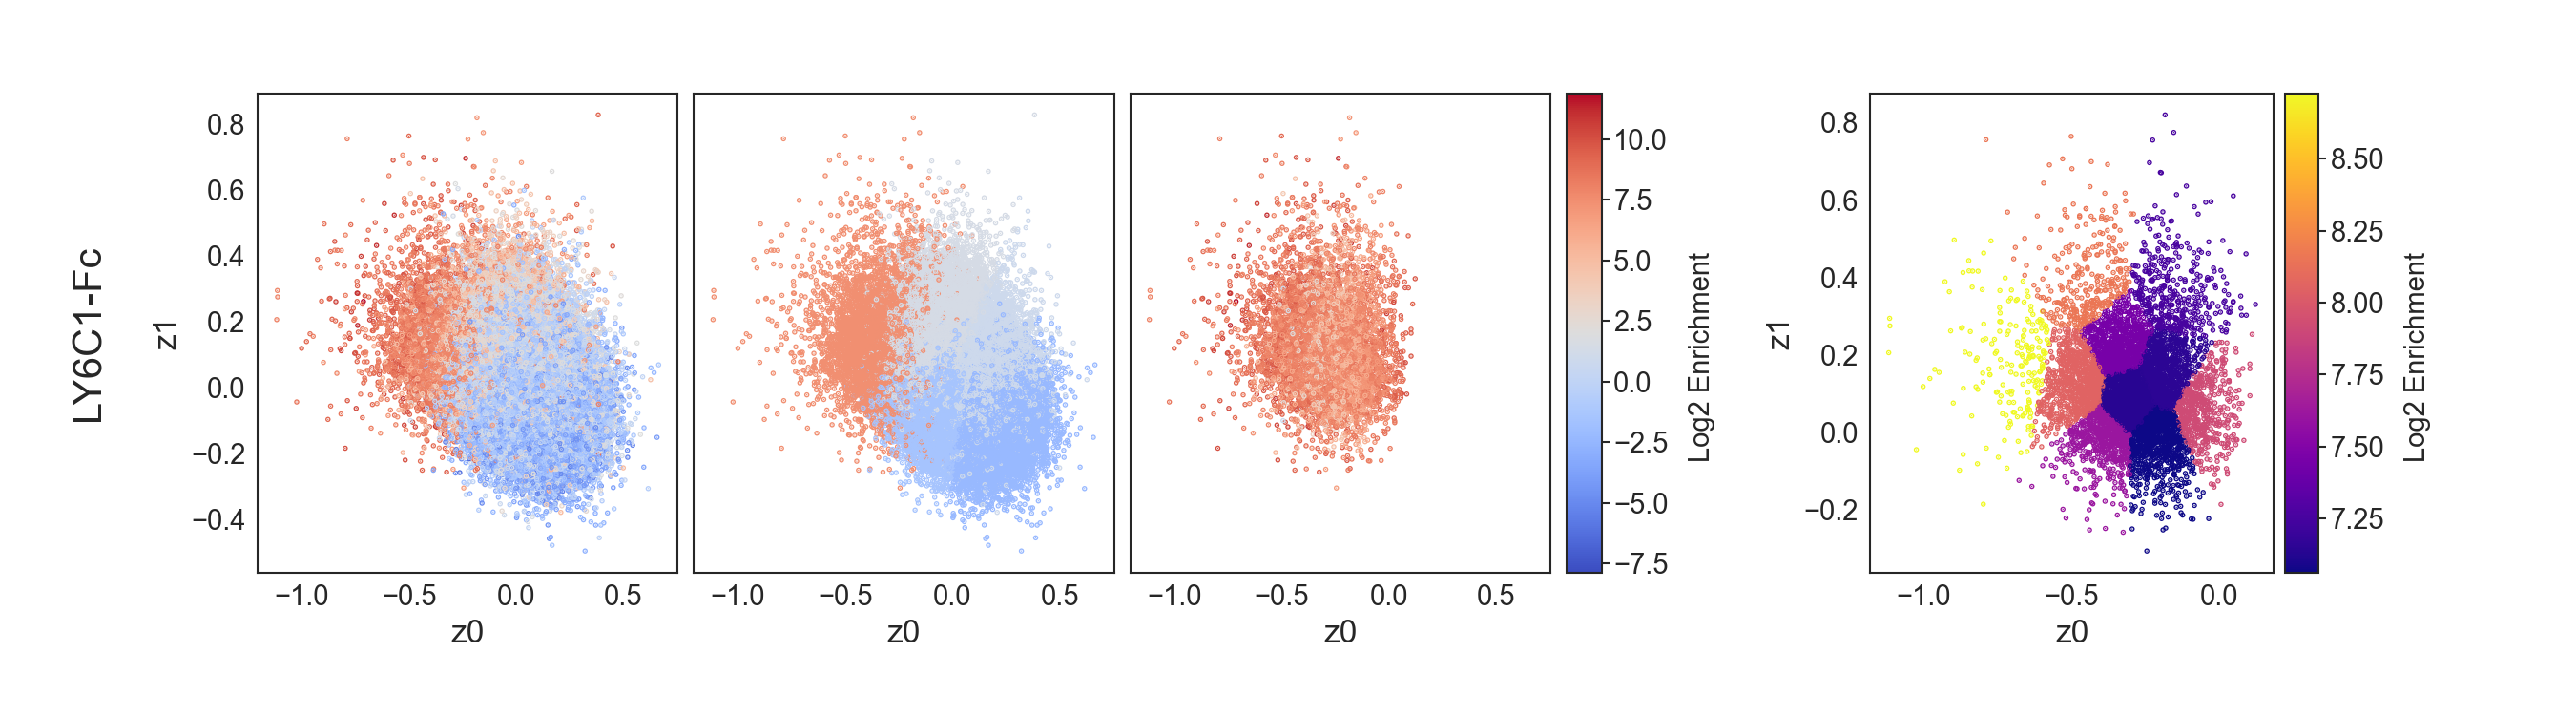

In [29]:
figname = 'fig4S3D'
png_path = plot_latent_spaces(LY6C1_preds, receptor='LY6C1', fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 4S4 - Ridge plots, binding and brain transduction

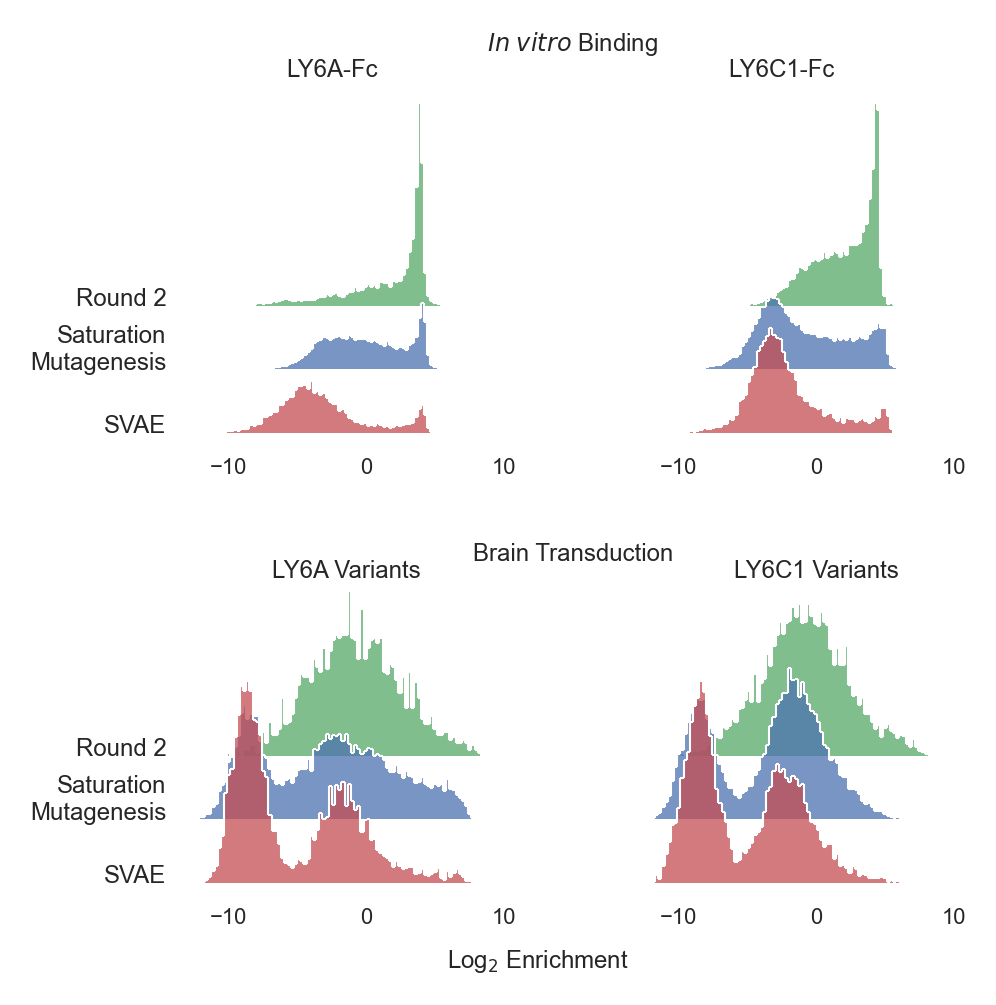

In [30]:
figname = 'fig4S4'
png_path = plot_assay_ridgeplots(fig_outdir=fig_outdir, figname=figname)
Image(png_path)

LY6A
LY6C1
Brain Transduction (LY6A)
Brain Transduction (LY6C1)


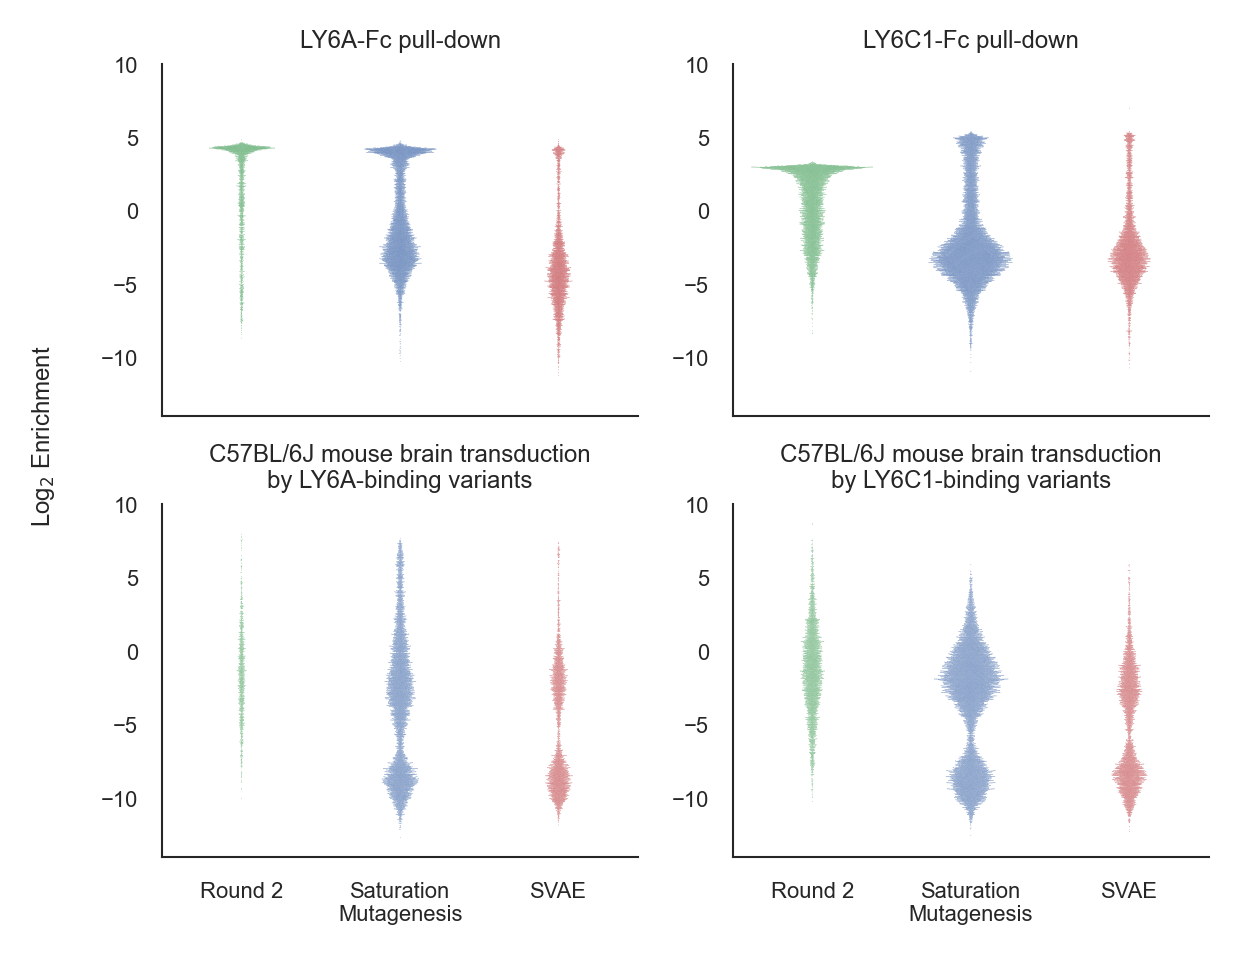

In [64]:
# Show individual data
figname = 'fig4S5'
png_path = swarm_plot_4f(fig_outdir=fig_outdir, figname=figname)
Image(png_path)